In [2]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#from tableone import TableOne

In [3]:
df = pd.read_csv('post_op_synthetic.csv', delimiter=';')

In [28]:
df.shape

(10000, 50)

In [10]:
df.describe()

,AkuttHel,AkuttDag,AkuttPK,ElHel,ElDag,ElPK,LoS,DtOp,innmateHast,Alder,...,KlartForOperasjon,KnivtidStart,KnivtidSlutt,StuetidSlutt,BMI_gruppe,ASA,LavestSystBT,LavestSystBT_NI,HøyestSystBT,HøyestSystBT_NI
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,8355.000000,8456.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.496900,0.008000,0.226200,0.43790,2.822900,3.843100,6.114300,1.48600,2.435800,74.138300,...,86.054700,97.666700,180.291800,193.786600,1.530341,2.348510,12.608200,79.054500,61.680500,121.108700
std,1.018182,0.126244,0.513673,0.95762,15.554399,4.812546,10.064689,4.99805,1.503098,10.191504,...,29.723951,33.306326,67.310884,69.420318,1.401846,1.202203,36.286531,46.313685,98.366797,64.934235
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,1.000000,29.000000,...,1.000000,18.000000,0.000000,26.000000,0.000000,0.000000,-320.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.00000,1.000000,66.000000,...,68.000000,72.000000,141.000000,156.000000,0.000000,2.000000,0.000000,77.000000,2.000000,134.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000,3.000000,0.00000,1.000000,74.000000,...,81.000000,95.000000,167.000000,180.000000,2.000000,3.000000,0.000000,84.000000,3.000000,145.000000
75%,1.000000,0.000000,0.000000,1.00000,0.000000,7.000000,7.000000,0.00000,4.000000,83.000000,...,103.000000,114.000000,229.000000,244.000000,3.000000,3.000000,0.000000,111.000000,185.000000,158.000000
max,9.000000,2.000000,4.000000,8.00000,156.000000,48.000000,97.000000,50.00000,5.000000,97.000000,...,306.000000,398.000000,350.000000,380.000000,5.000000,5.000000,113.000000,201.000000,327.000000,244.000000


In [18]:
sorted(df.columns)

['ASA',
 'ASA_previsitt',
 'AkuttDag',
 'AkuttHel',
 'AkuttPK',
 'Alder',
 'Alvorlighet',
 'AnestesiGrp',
 'AnestesiStart',
 'BMI_gruppe',
 'DtOp',
 'ElDag',
 'ElHel',
 'ElPK',
 'HarAntibiotika',
 'HarMemo',
 'HastegradGrp',
 'HovedInngrepGrp',
 'HøyestSystBT',
 'HøyestSystBT_NI',
 'ICD10kap',
 'Intubert',
 'Kjonn',
 'KlartForOperasjon',
 'KnivtidSlutt',
 'KnivtidStart',
 'LavestSystBT',
 'LavestSystBT_NI',
 'LoS',
 'Operasjonsavdeling',
 'Opkategori',
 'PlanlagtKnivtid',
 'Postop',
 'Postop_Actilyse',
 'Postop_Intensiv',
 'Postop_Traume',
 'ProblemkodeGrp',
 'Smitte',
 'StuetidSlutt',
 'StuetidStart',
 'Target',
 'TempTatt',
 'TryggKirurgi_Avslutnsjekk',
 'TryggKirurgi_Forberedelsessjekk',
 'TryggKirurgi_Timeout',
 'Ukedag',
 'Undergruppe_operasjonskorGrp',
 'Varighet',
 'Ventetid_dager',
 'innmateHast']

In [21]:
old_names = [
    'AkuttHel',
    'AkuttDag',
    'AkuttPK',
    'ElHel',
    'ElDag',
    'ElPK',
    'LoS',
    'DtOp',
    'innmateHast',
    'ICD10kap',
    'Kjonn',
    'Alder',
    'Operasjonsavdeling',
    'Undergruppe_operasjonskorGrp',
    'HovedInngrepGrp',
    'AnestesiGrp',
    'ASA_previsitt',
    'Smitte',
    'Ukedag',
    'Ventetid_dager',
    'HastegradGrp',
    'Opkategori',
    'Postop',
    'PlanlagtKnivtid',
    'StuetidStart',
    'AnestesiStart',
    'KlartForOperasjon',
    'KnivtidStart',
    'KnivtidSlutt',
    'StuetidSlutt',
    'TryggKirurgi_Forberedelsessjekk',
    'TryggKirurgi_Timeout',
    'TryggKirurgi_Avslutnsjekk',
    'Postop_Intensiv',
    'Postop_Actilyse',
    'Postop_Traume',
    'BMI_gruppe',
    'HarMemo',
    'ASA',
    'HarAntibiotika',
    'ProblemkodeGrp',
    'Alvorlighet',
    'Varighet',
    'LavestSystBT',
    'LavestSystBT_NI',
    'HøyestSystBT',
    'HøyestSystBT_NI',
    'TempTatt',
    'Intubert',
    'Target'
]

new_names = [
    'Number of emergency admissions in the year prior to operation',
    'Number of emergency day treatments in the year prior to operation',
    'Number of emergency policlinical contacts in the year prior to operation',
    'Number of planned admissions in the year prior to operation',
    'Number of planned day treatments in the year prior to operation',
    'Number of planned policlinical contacts in the year prior to operation',
    'Length of hospital stay of the operation',
    'Days in hospital prior to operation',
    'Type of admission',
    'ICD10-letter of primary diagnosis on the hospital episode containing the operation',
    'Sex of the patient',
    'Age at time of operation',
    'Location of the operation',
    'Classification of the operation',
    'Main procedure performed of the operation - First letter (NCSP)',
    'Primary anesthetic code of operation (NCMP)',
    'ASA-score before the operation (registered in the operation program)',
    'Is the patient contagious?',
    'Day of the week of operation',
    'Number of days the patient has waited for operation (from registrered in operation program)',
    'Priority-classification of operation',
    'Emergency (ØH) or planned (Elektiv) operation',
    'Was the patient admitted to post-operative ward',
    'Planned time of surgery',
    'Minutes from operation team gets the patient until start in the OR',
    'Minutes from operation team gets the patient until start of anesthesia',
    'Minutes from operation team gets the patient until patient is ready for surgery',
    'Minutes from operation team gets the patient until start of surgery',
    'Minutes from operation team gets the patient until end of surgery',
    'Minutes from operation team gets the patient until patient leaves the OR',
    'Checklist prior to surgery completed',
    'Checklist during surgery completed',
    'Checklist after surgery completed',
    'Intensive care treatment at post-operative ward',
    'Patient treated with actilyse at post-operative ward',
    'Patient registered with trauma at post-operative ward',
    'BMI group of patientient - 0 = unknown, from low to high',
    'Is there a memo registered in the anesthesia program',
    'ASA score registered in the anesthesia program',
    'Has antibiotics been administered during the operation',
    'Was there a problem code registered during the operation',
    'How serious was the problem',
    'How long did the problem last',
    'Lowest automatically recorded blood pressure (invasive) during operation',
    'Lowest recorded blood pressure (non-invasive) during operation',
    'Highest automatically recorded blood pressure (invasive) during operation',
    'Highest  recorded blood pressure (non-invasive) during operation',
    'Was temperature taken and registered',
    'Was the patient intubated',
    'Number of emergency re-admission(s) to the hospital within 30 days.'
]

name_dict = {on:new_names[i] for i,on in enumerate(old_names)}

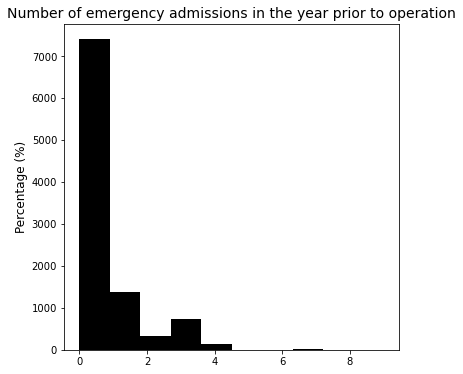

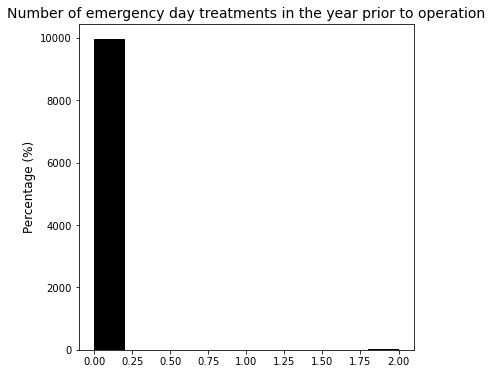

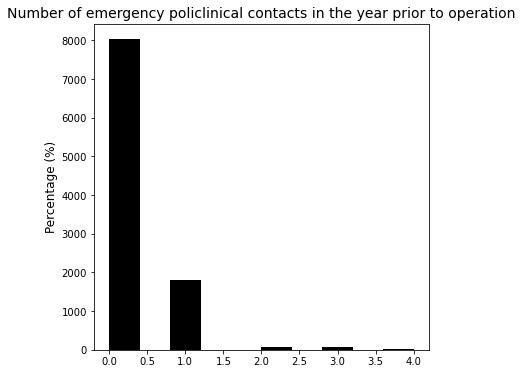

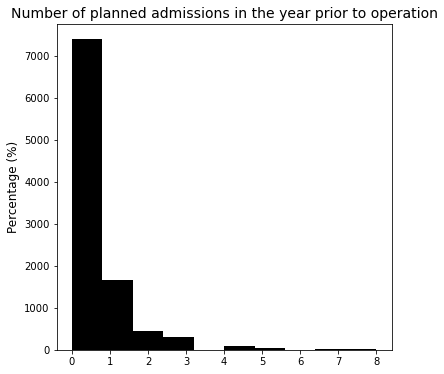

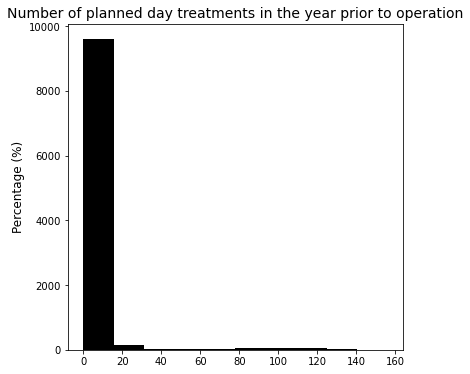

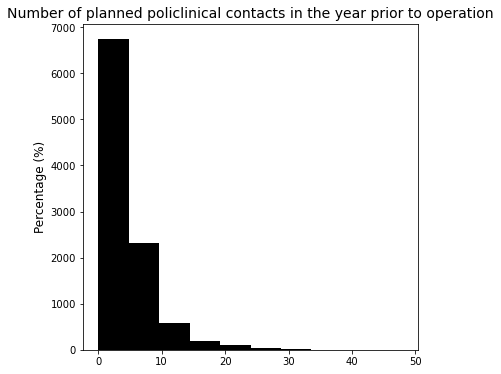

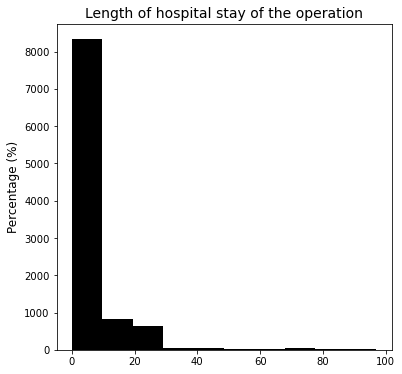

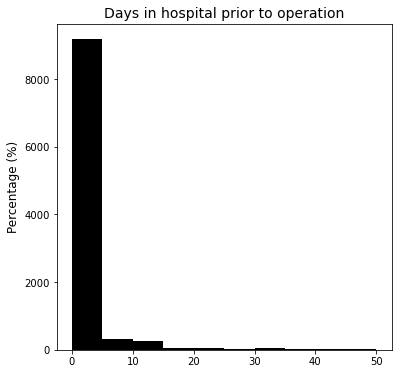

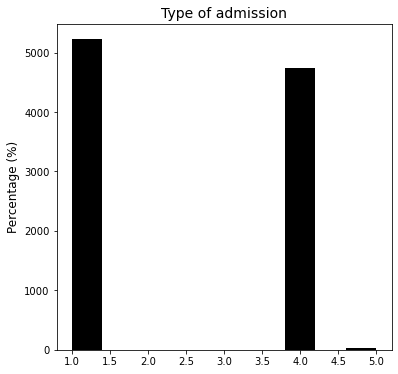

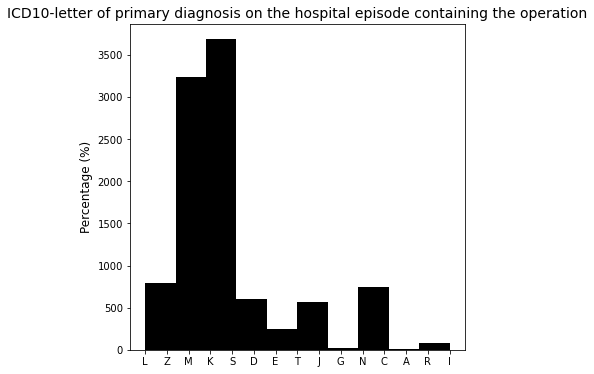

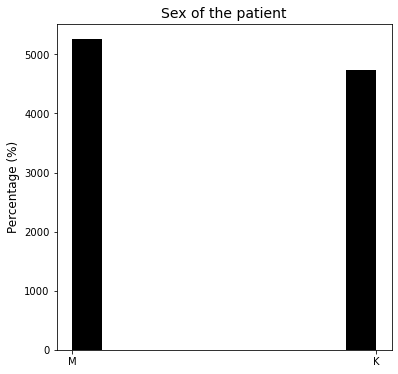

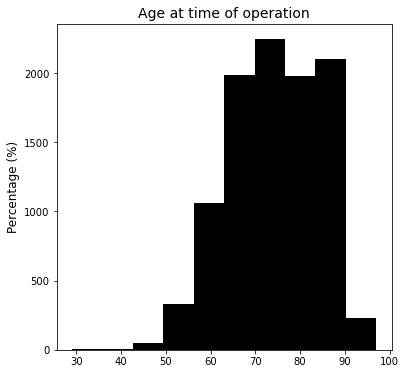

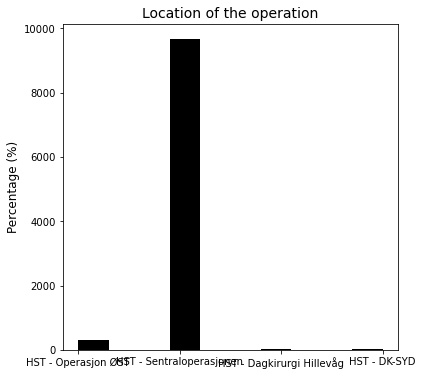

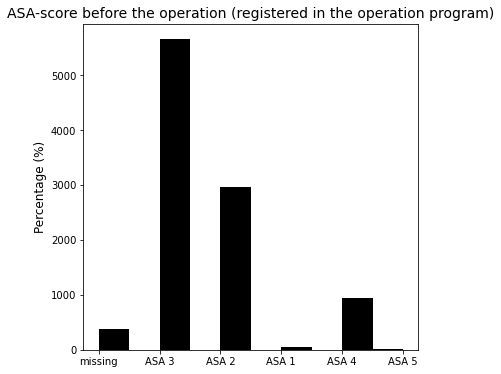

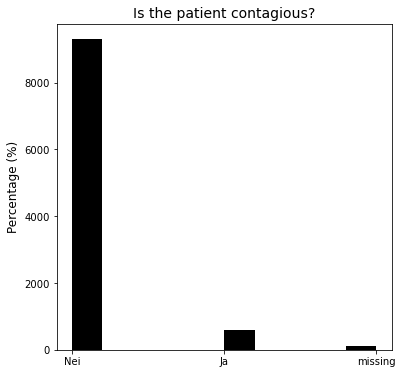

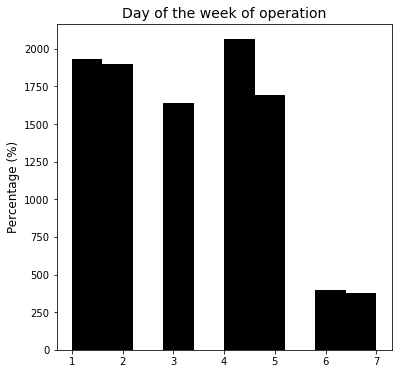

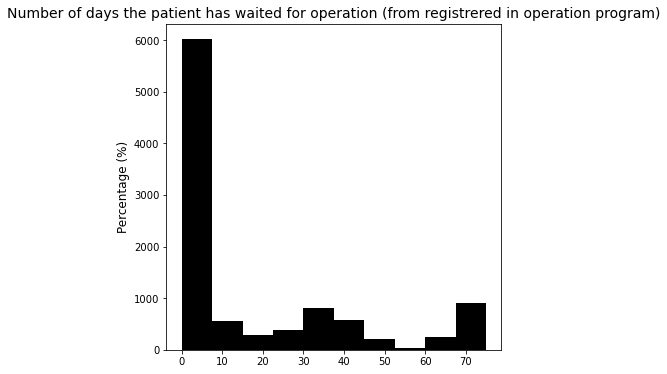

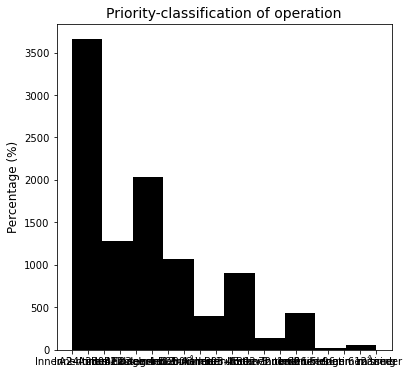

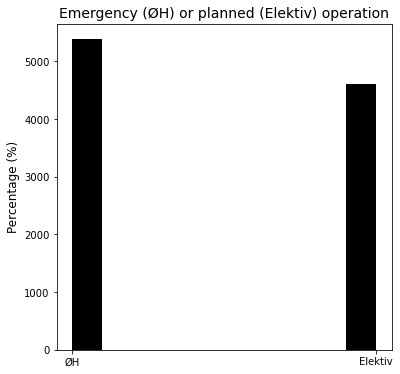

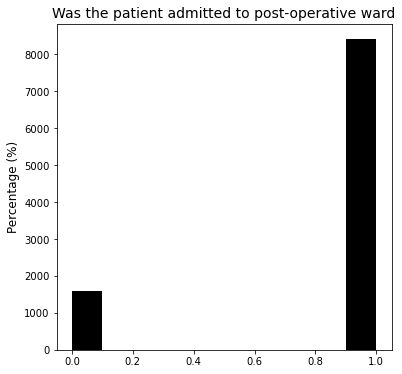

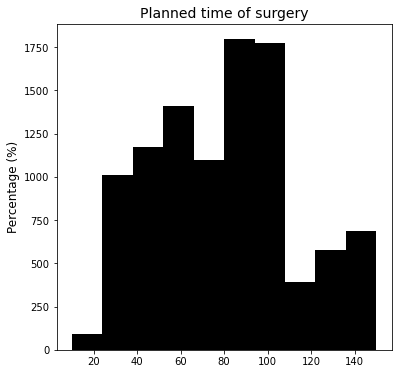

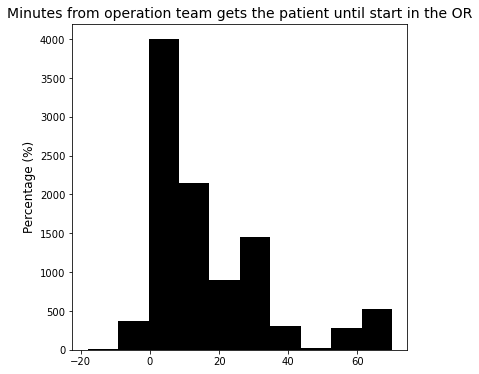

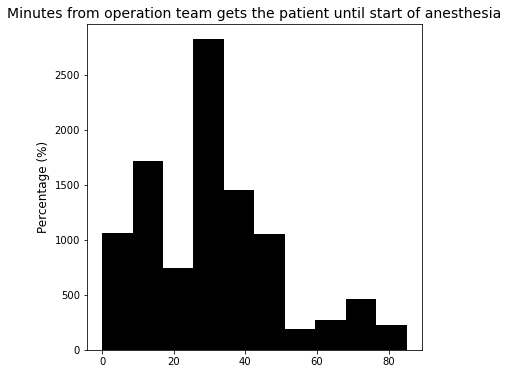

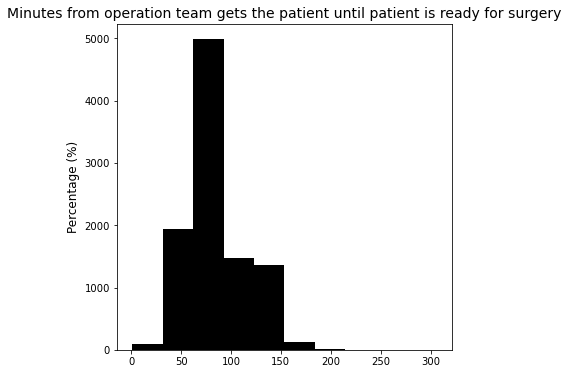

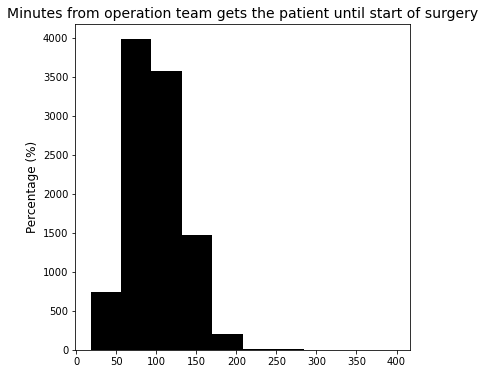

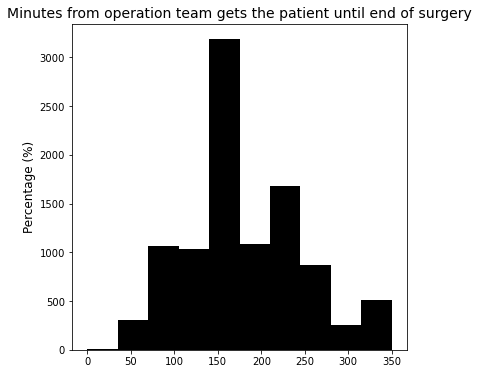

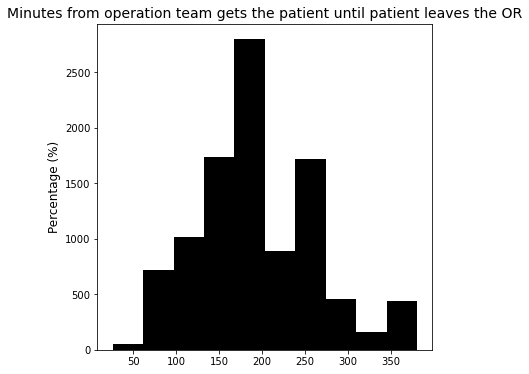

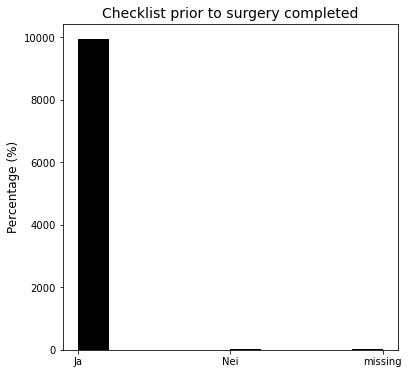

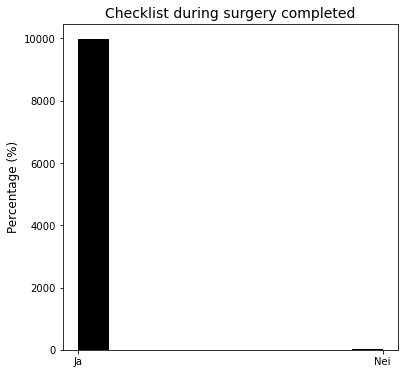

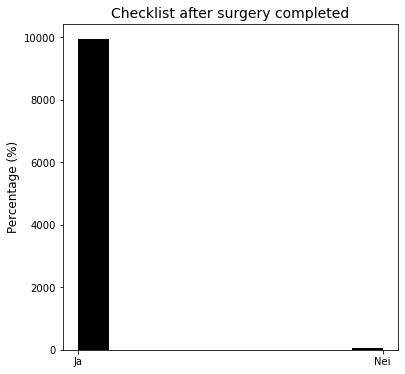

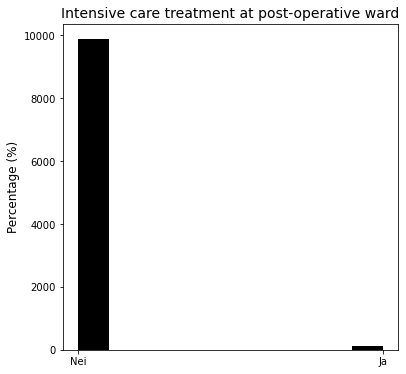

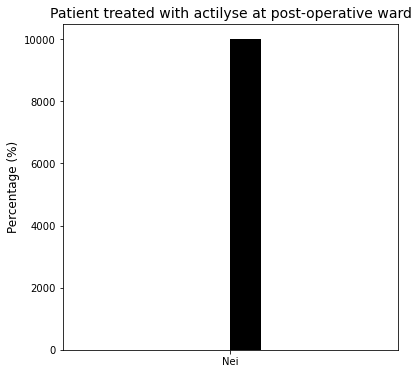

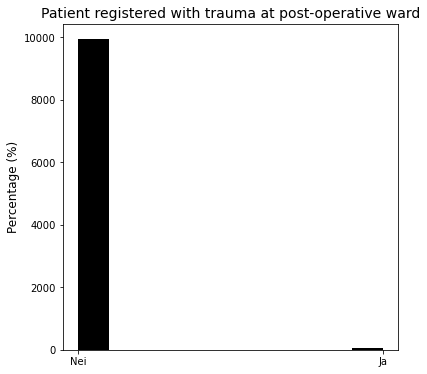

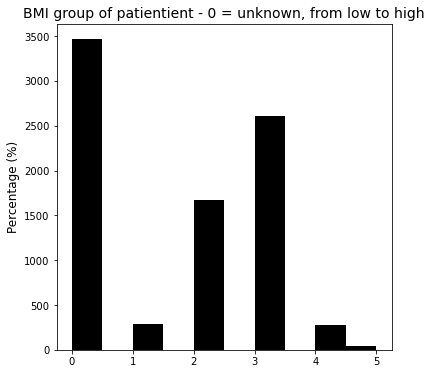

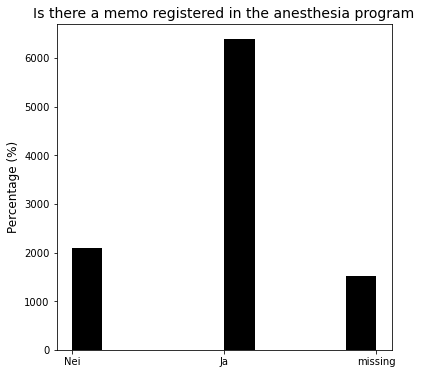

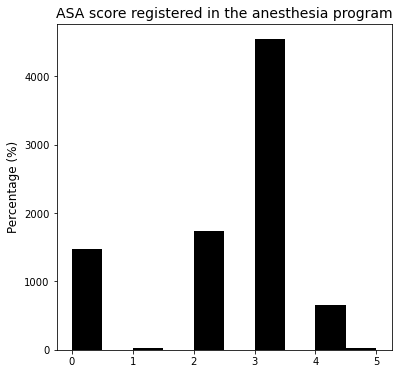

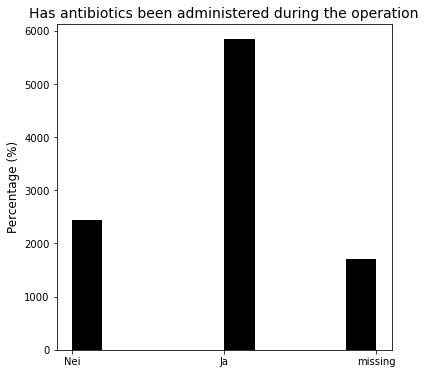

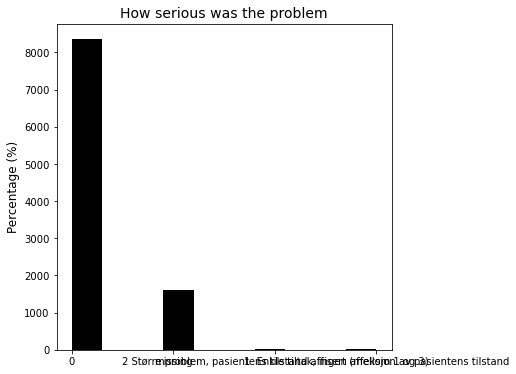

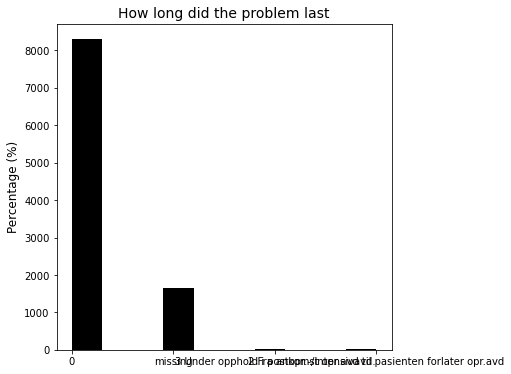

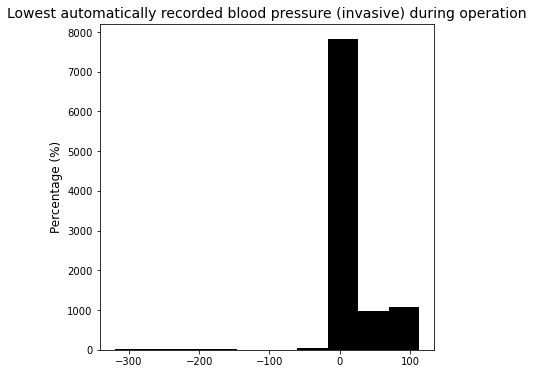

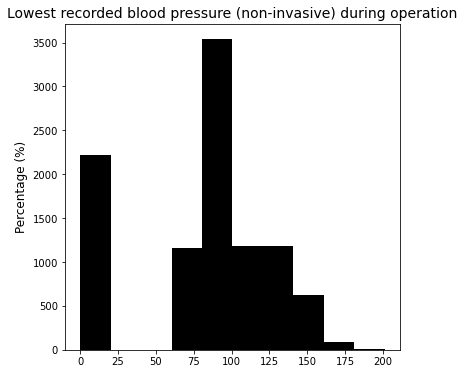

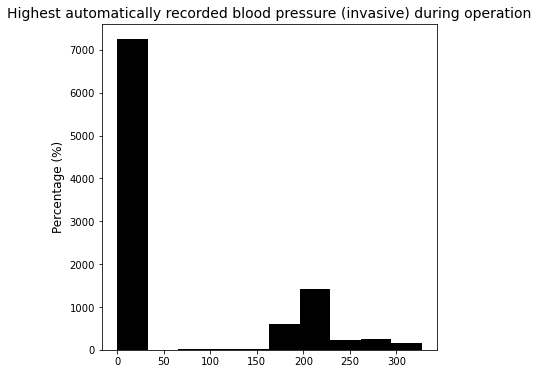

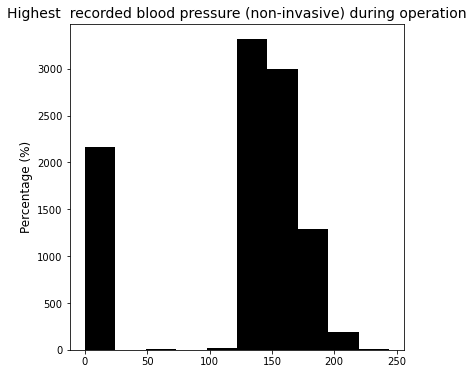

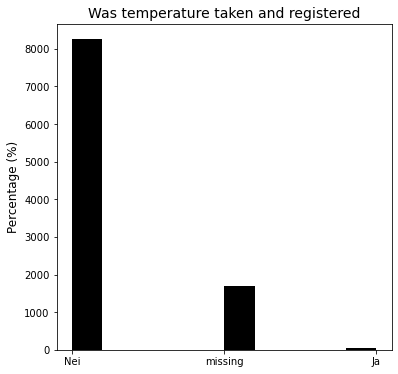

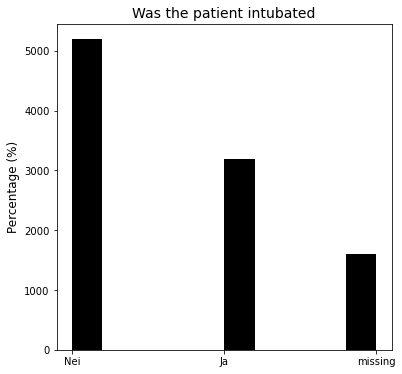

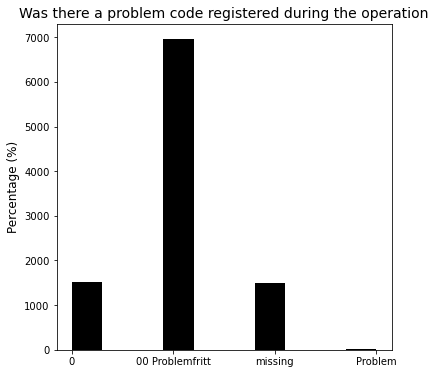

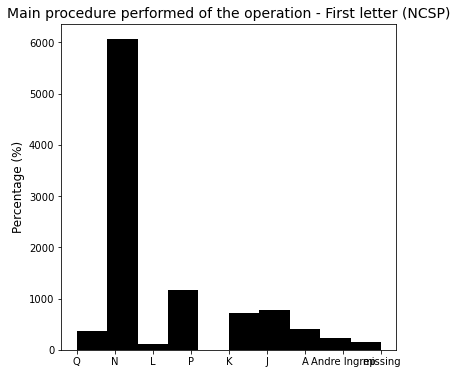

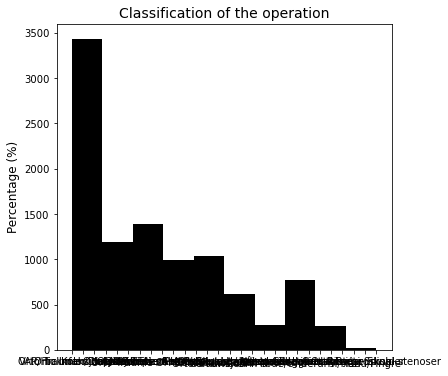

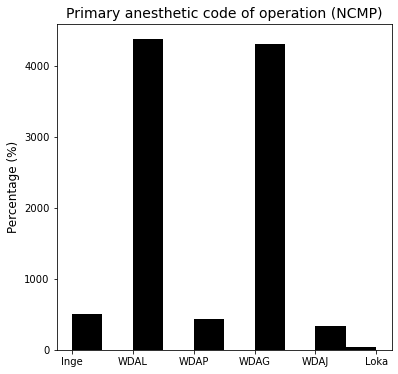

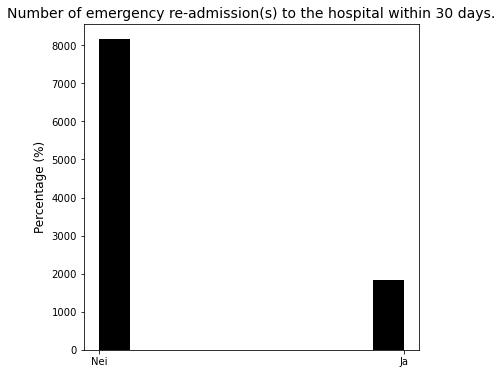

In [23]:
for cat in df.columns:
    plt.figure(figsize=(6,6))
    plt.hist(df[cat], color='k')
    plt.xlabel('', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.title(name_dict[cat], fontsize=14)
    plt.show()

In [21]:
Counter(df['Operasjonsavdeling'])

Counter({'HST - Operasjon ØST': 313,
         'HST - Sentraloperasjonen': 9658,
         'HST - Dagkirurgi Hillevåg': 14,
         'HST - DK-SYD': 15})

In [30]:
100*(df.isna().sum()/df.shape[0])

AkuttHel                            0.00
AkuttDag                            0.00
AkuttPK                             0.00
ElHel                               0.00
ElDag                               0.00
ElPK                                0.00
LoS                                 0.00
DtOp                                0.00
innmateHast                         0.00
ICD10kap                            0.00
Kjonn                               0.00
Alder                               0.00
Operasjonsavdeling                  0.00
ASA_previsitt                       0.00
Smitte                              0.00
Ukedag                              0.00
Ventetid_dager                      0.00
HastegradGrp                        0.00
Opkategori                          0.00
Postop                              0.00
PlanlagtKnivtid                     0.00
StuetidStart                        0.00
AnestesiStart                       0.00
KlartForOperasjon                   0.00
KnivtidStart    

In [23]:
Counter(df['Target'])

Counter({'Nei': 8160, 'Ja': 1840})

(0.0, 30.0)

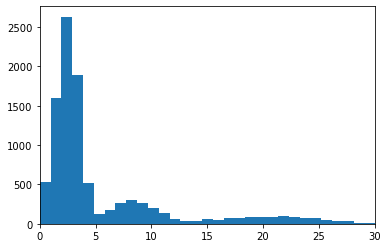

In [36]:
plt.hist(df['LoS'], bins=100)
plt.xlim([0,30])

Counter({'ØH': 5387, 'Elektiv': 4613})
Counter({'ASA 3': 5652, 'ASA 2': 2965, 'ASA 4': 943, 'missing': 371, 'ASA 1': 47, 'ASA 5': 22})
ASA 2
ASA 3
ASA 4


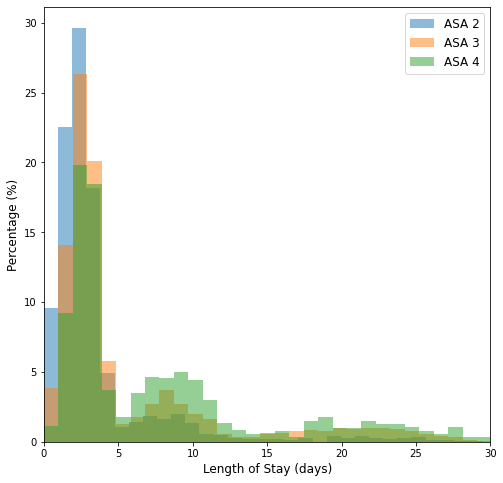

In [14]:
print(Counter(df['Opkategori']))

all_cats = ['Opkategori', 'ICD10kap', 'ASA_previsitt']
for cat in all_cats:
    if cat != 'ASA_previsitt':
        continue
    plt.figure(figsize=(8,8))
    print(Counter(df[cat]))
    for o in sorted(set(df[cat])):
#         if o != 'missing':
#          continue
        if o not in ['ASA 2', 'ASA 3', 'ASA 4']:
            continue
        print(o)
        temp_df = df[df[cat]==o]
        plt.hist(temp_df['LoS'], weights=100*np.ones(len(temp_df['LoS']))/len(temp_df['LoS']), alpha=0.5, bins=100, label=o)
    plt.xlim([0,30])
    plt.legend(fontsize=12)
    plt.xlabel('Length of Stay (days)', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.savefig('LoS___ASA.png')
    plt.show()

Counter({'S': 3271, 'M': 3242, 'D': 605, 'N': 529, 'T': 465, 'Z': 431, 'K': 414, 'L': 364, 'E': 246, 'C': 218, 'J': 101, 'R': 77, 'G': 18, 'A': 14, 'I': 5})
Z


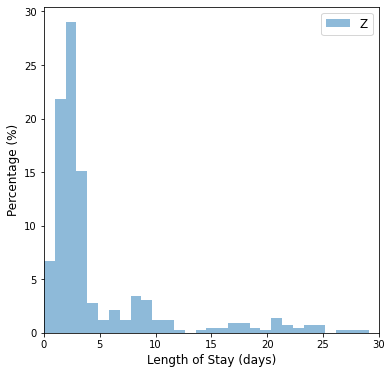

K


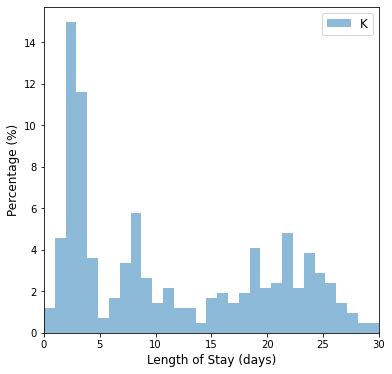

D


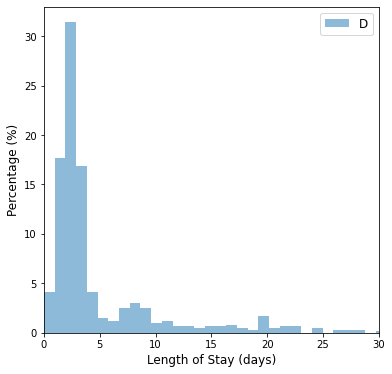

L


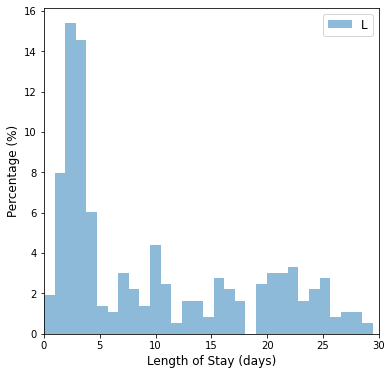

N


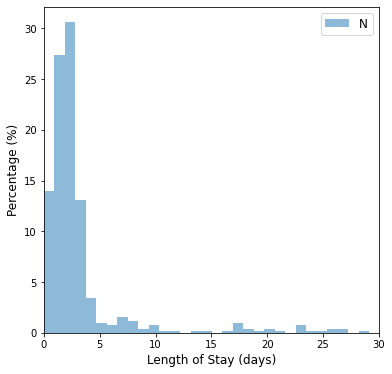

S


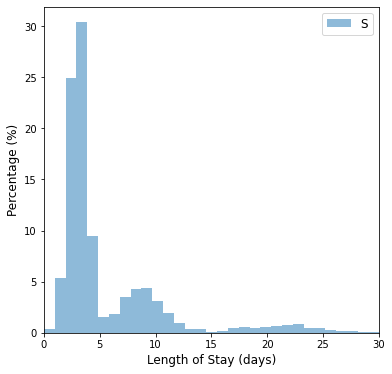

T


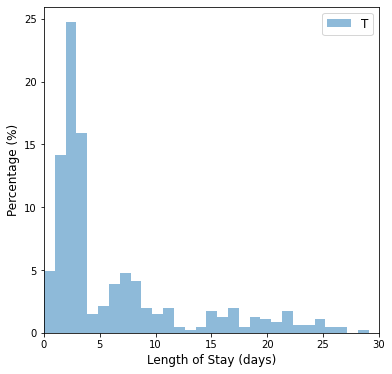

J


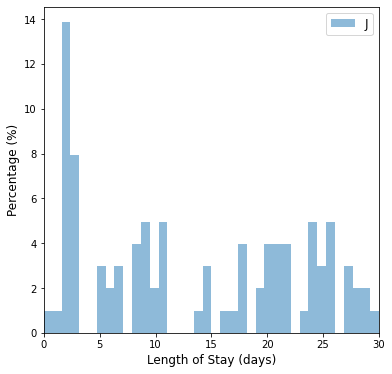

A


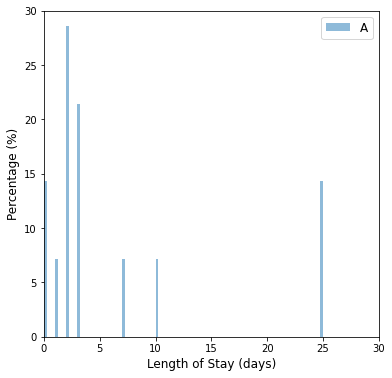

E


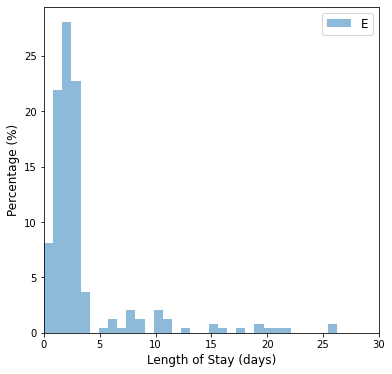

C


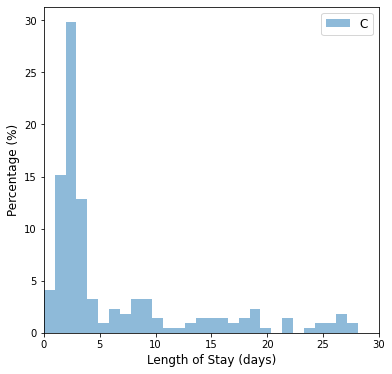

M


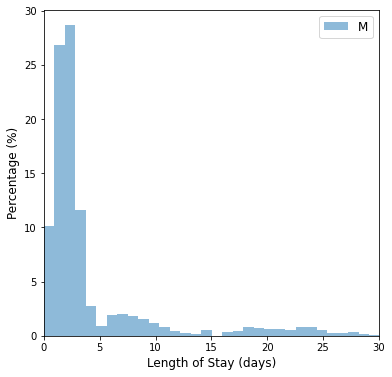

R


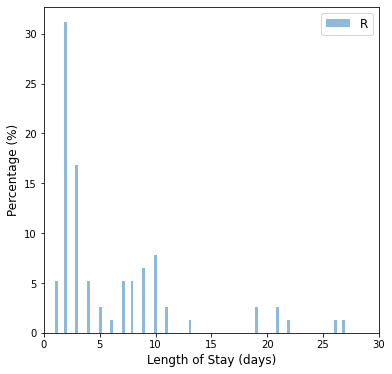

I


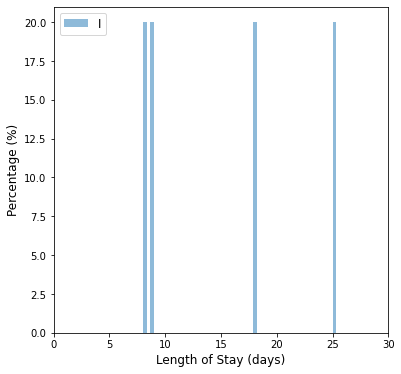

G


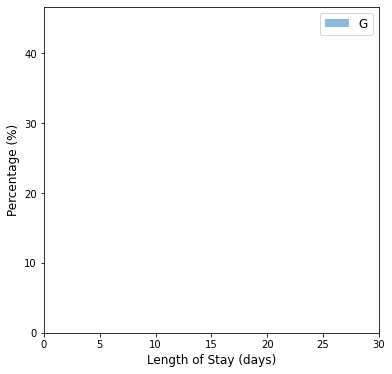

In [52]:
print(Counter(df['ICD10kap']))

#plt.figure(figsize=(6,6))
for o in set(df['ICD10kap']):
    print(o)
    plt.figure(figsize=(6,6))
    temp_df = df[df['ICD10kap']==o]
    plt.hist(temp_df['LoS'], weights=100*np.ones(len(temp_df['LoS']))/len(temp_df['LoS']), alpha=0.5, bins=100, label=o)
    plt.xlim([0,30])
    plt.legend(fontsize=12)
    plt.xlabel('Length of Stay (days)', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.show()
    #plt.xlim([0,30])
#plt.legend(fontsize=12)
#plt.xlabel('Length of Stay (days)', fontsize=12)
#plt.ylabel('Percentage (%)', fontsize=12)
#plt.show()

(array([7.659e+03, 0.000e+00, 8.620e+02, 0.000e+00, 1.830e+02, 0.000e+00,
        2.620e+02, 0.000e+00, 2.140e+02, 0.000e+00, 9.300e+01, 0.000e+00,
        4.900e+01, 0.000e+00, 5.000e+01, 0.000e+00, 6.200e+01, 0.000e+00,
        7.500e+01, 0.000e+00, 6.000e+01, 0.000e+00, 6.800e+01, 0.000e+00,
        6.300e+01, 0.000e+00, 3.700e+01, 0.000e+00, 2.600e+01, 0.000e+00,
        1.700e+01, 0.000e+00, 1.200e+01, 0.000e+00, 8.000e+00, 0.000e+00,
        4.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 4.000e+00, 0.000e+00,
        7.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 1.400e+01, 0.000e+00,
        1.800e+01, 0.000e+00, 8.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        7.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 8.000e+00, 0.000e+00,
        9.000e+00, 0.000e+00, 8.000e+00, 0.000e+00, 6.000e+00, 0.000e+00,
        9.000e+00, 0.000e+00, 1.100e+01, 0.000e+00, 7.000e+00, 0.000e+00,
        8.000e+00, 0.000e+00, 5.000e+00, 0.000e+00, 6.000e+00, 0.000e+00,
        8.000e+00, 0.000e+00, 3.000e+0

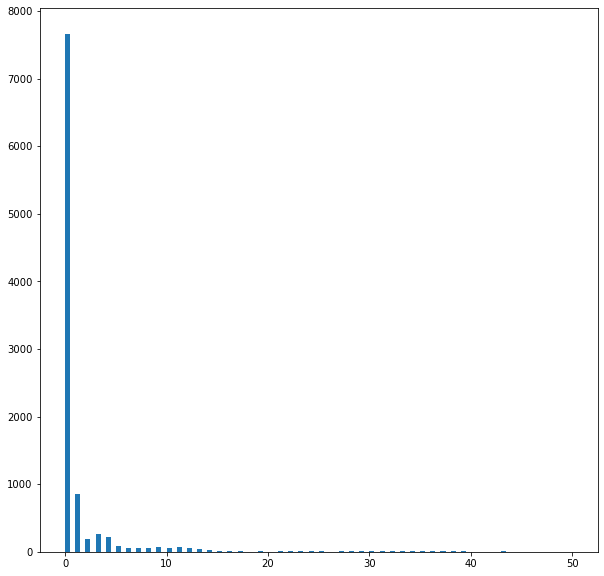

In [56]:
plt.figure(figsize=(10,10))
plt.hist(df['DtOp'], bins=100)